In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel data to range 0-1


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to a vector
    layers.Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    layers.Dropout(0.2),                   # Dropout for regularization to reduce overfitting
    layers.Dense(10)                       # Output layer with 10 nodes for 10 classes
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])


In [5]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8635 - loss: 0.4744
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9549 - loss: 0.1533
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9679 - loss: 0.1084
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9730 - loss: 0.0863
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9773 - loss: 0.0737


In [6]:
model.evaluate(x_test, y_test, verbose=2)


313/313 - 2s - 6ms/step - accuracy: 0.9751 - loss: 0.0797


[0.07974939048290253, 0.9750999808311462]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


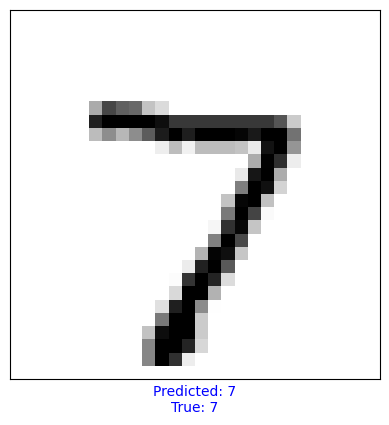

In [7]:
import matplotlib.pyplot as plt
import numpy as np

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"Predicted: {predicted_label}\nTrue: {true_label}", color=color)

plot_image(0, predictions[0], y_test, x_test)
plt.show()


In [8]:
model.save('my_mnist_model.h5')
